## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [2]:
import pandas as pd

file_path = 'data/heart_failure_clinical_records_dataset.csv'
data_hf = pd.read_csv(file_path)

# Skontroluje, či dataset obsahuje duplicitné riadky
data_hf.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

**Obsahuje dataset duplicitné záznamy?**

### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [13]:
# Počet nefajčiarov v datasete
non_smokers = data_hf[data_hf['smoking'] == 0].shape[0]

filtered_male = data_hf[(data_hf['sex'] == 1) & (data_hf['smoking'] == 0)].shape[0]
filtered_female = data_hf[(data_hf['sex'] == 0) & (data_hf['smoking'] == 0)].shape[0]

print(f"Celkový počet nefajčiarov: {non_smokers}")
print(f"nefajciarov muzov je: {filtered_male}")
print(f"nefajciarov zien je: {filtered_female}")

Celkový počet nefajčiarov: 203
nefajciarov muzov je: 102
nefajciarov zien je: 101


**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [71]:
data_hf['age'].mode()

0    60.0
Name: age, dtype: float64

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

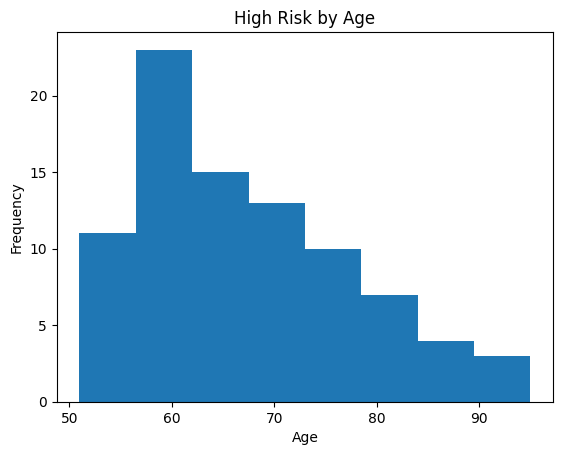

In [72]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

In [80]:
high_risk = data_hf[data_hf['risk'] == 'High']
high_risk_sixty_age = high_risk[high_risk['age'] == 60]

high_risk_sixty_age['age'].value_counts()

age
60.0    18
Name: count, dtype: int64

**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


In [114]:
# Predpokladajme, že 'data_hf' je tvoj pôvodný DataFrame s týmito stĺpcami
numeric_data = data_hf.select_dtypes(include=['float64', 'int64'])

# Vytvorenie korelačnej matice
correlation_matrix = numeric_data.corr()

# Nájdeme najväčšiu koreláciu (okrem korelácie sám so sebou)
correlation_unstacked = correlation_matrix.unstack()
correlation_unstacked = correlation_unstacked[correlation_unstacked < 1]  # Odstránenie diagonály
max_correlation = correlation_unstacked.idxmax()
max_correlation_value = correlation_unstacked.max()

# Nájdeme tretiu najväčšiu zápornú koreláciu
negative_correlations = correlation_unstacked.sort_values()

first_most_negative_corr = negative_correlations.index[0]
first_most_negative_value = negative_correlations.iloc[0]

third_most_negative_corr = negative_correlations.index[2]
third_most_negative_value = negative_correlations.iloc[2]

# Výpis výsledkov
print(f"Najvacsia korelacia je medzi {max_correlation} s hodnotou {max_correlation_value:.3f}")
print(f"Prva najvacsia korelacie je medzi {first_most_negative_corr} s hodnotou {first_most_negative_value:.3f}")
print(f"Druha najvacsia zaporna korelácia je medzi {third_most_negative_corr} s hodnotou {third_most_negative_value:.3f}")


Najvacsia korelacia je medzi ('sex', 'smoking') s hodnotou 0.446
Prva najvacsia korelacie je medzi ('DEATH_EVENT', 'time') s hodnotou -0.527
Druha najvacsia zaporna korelácia je medzi ('ejection_fraction', 'DEATH_EVENT') s hodnotou -0.269


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure